# AIDApy - Notebooks for School

## Aidapy Installation on Google Colab

In order ti run all the notebooks and reproduce the results, the first step is to install the ***aidapy*** Python Package. There are several ways to accomplish that. Tha most efficient and easy way to do that is by using GitLab clone.

In [ ]:
%rm -rf aidapy
!git clone https://gitlab.com/aidaspace/aidapy.git aidapy
%cd aidapy
!git pull --all
!git checkout notebooks_merge_dev
!pip install -e .[ml]
!pip uninstall -y heliopy
!pip install heliopy==0.15.0

Cloning into 'aidapy'...
remote: Enumerating objects: 8495, done.
remote: Counting objects: 100% (2234/2234), done.
remote: Compressing objects: 100% (892/892), done.
remote: Total 8495 (delta 1372), reused 2159 (delta 1301), pack-reused 6261
Receiving objects: 100% (8495/8495), 255.76 MiB | 19.15 MiB/s, done.
Resolving deltas: 100% (5280/5280), done.
Checking out files: 100% (302/302), done.
/content/aidapy
Fetching origin
Already up to date.
Branch 'notebooks_merge_dev' set up to track remote branch 'notebooks_merge_dev' from 'origin'.
Switched to a new branch 'notebooks_merge_dev'
Obtaining file:///content/aidapy
     |████████████████████████████████| 6.0 MB 8.1 MB/s 
     |████████████████████████████████| 68 kB 7.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 929 kB 41.4 MB/s 
     |████████████████████████████████| 308 kB 42.5 MB/s 
     |███████████████

In [ ]:
!pip install osfclient
!osf -p 48jyb clone .

0files [00:00, ?files/s]
  0% 0.00/47.5M [00:00<?, ?bytes/s]
 11% 5.11M/47.5M [00:00<00:00, 51.1Mbytes/s]
 27% 13.0M/47.5M [00:00<00:00, 67.6Mbytes/s]
 46% 22.1M/47.5M [00:00<00:00, 78.0Mbytes/s]
 63% 29.9M/47.5M [00:00<00:00, 72.1Mbytes/s]
 78% 37.1M/47.5M [00:00<00:00, 70.8Mbytes/s]
100% 47.5M/47.5M [00:00<00:00, 71.9Mbytes/s]
1files [00:06,  6.88s/files]
100% 2.82M/2.82M [00:00<00:00, 131Mbytes/s]
2files [00:08,  3.65s/files]
  0% 0.00/30.9M [00:00<?, ?bytes/s]
 35% 10.8M/30.9M [00:00<00:00, 108Mbytes/s]
100% 30.9M/30.9M [00:00<00:00, 135Mbytes/s]
3files [00:09,  2.75s/files]
100% 7.42M/7.42M [00:00<00:00, 112Mbytes/s]
4files [00:11,  2.29s/files]
  0% 0.00/79.0M [00:00<?, ?bytes/s]
 13% 10.5M/79.0M [00:00<00:00, 105Mbytes/s]
 33% 26.3M/79.0M [00:00<00:00, 136Mbytes/s]
 50% 39.9M/79.0M [00:00<00:00, 127Mbytes/s]
 68% 53.5M/79.0M [00:00<00:00, 130Mbytes/s]
100% 79.0M/79.0M [00:00<00:00, 137Mbytes/s]
5files [00:13,  2.72s/files]


In [ ]:
%rm -rf data
%mkdir data
!unzip osfstorage/CoronalHoles.zip -d data/CoronalHoles
!unzip osfstorage/CoronalHoles_test.zip -d data/CoronalHoles_test
!unzip osfstorage/Coronal_Holes_unsupervised_case.zip -d data/Coronal_Holes_unsupervised_case

Archive:  osfstorage/CoronalHoles.zip
   creating: data/CoronalHoles/CoronalHoles/
   creating: data/CoronalHoles/CoronalHoles/IMGS/
  inflating: data/CoronalHoles/CoronalHoles/IMGS/20120531_230000_aia_imge.jpg  
  inflating: data/CoronalHoles/CoronalHoles/IMGS/20120606_230000_aia_imge.jpg  
  inflating: data/CoronalHoles/CoronalHoles/IMGS/20120611_230000_aia_imge.jpg  
  inflating: data/CoronalHoles/CoronalHoles/IMGS/20120626_230000_aia_imge.jpg  
  inflating: data/CoronalHoles/CoronalHoles/IMGS/20120628_230000_aia_imge.jpg  
  inflating: data/CoronalHoles/CoronalHoles/IMGS/20120629_230000_aia_imge.jpg  
  inflating: data/CoronalHoles/CoronalHoles/IMGS/20120630_230000_aia_imge.jpg  
  inflating: data/CoronalHoles/CoronalHoles/IMGS/20120722_230000_aia_imge.jpg  
  inflating: data/CoronalHoles/CoronalHoles/IMGS/20120701_230000_aia_imge.jpg  
  inflating: data/CoronalHoles/CoronalHoles/IMGS/20130120_230000_aia_imge.jpg  
  inflating: data/CoronalHoles/CoronalHoles/IMGS/20130121_230000_ai

In [ ]:
# Test the installation of AidaPy package
import aidapy

Creating download directory /root/heliopy/data


# ***Supervised Case*** - Coronal Holes Segmentation using Neural Networks

## Coronal Holes Segmentation - Training

In this notebook you will learn how to perform Coronal Holes Segmentation using a UNet model.Coronal holes appear as dark areas in the solar corona in extreme ultraviolet (EUV) and soft x-ray solar images. They appear dark because they are cooler, less dense regions than the surrounding plasma and are regions of open, unipolar magnetic fields.Coronal holes segmentation is one of the many use-cases integrated in aidapy. In this notebook we will use supervised learning to perform this task.

    



 ### 1. Import all the necessary packages.
First we import some standard python libraries. 
Then we import all the necessary modules integrated in aidapy to run this use-case. These modules are located in the ml directory which is responsible for performing all the machine learning procedures.

In [ ]:
import os
import os.path as osp
import torch
from torch.utils.data import dataloader
import numpy as np
import cv2
import random 
%matplotlib inline
import matplotlib.pyplot as plt

from aidapy.ml.metrics import Metrics
from aidapy.ml.loss import Loss
from aidapy.ml.data.coronalholes import CoronalHoles
from aidapy.ml.models.model import Model
from aidapy.ml.optim.optim import make_optimizer
from aidapy.ml.postprocess import PostProcessor
from aidapy.ml.utils.logger import Logger
from aidapy.ml.visualization import Visualizer
import time

# The following commands are necessary to make the results reproducible
random.seed(4)
torch.manual_seed(4)
torch.backends.cudnn.deterministic = True

### 2. Create the necessary directories to save the results

Here we set the necessary paths and create the directories to save the results. 
Necessary directories:
The directory that has the results of all the use casesThe directory that has the results of the specific use-case
  

In [ ]:
# The directory that has the results of all the use cases
expdir = "Experiments"

# The directory that has the result of a specific use case.
expname = "Coronal_Holes"

# Check and Create Folders
os.makedirs(expdir, exist_ok=True)

# The total path 
total_dir = osp.join(expdir, expname)

# Create the directories for the results
os.makedirs(total_dir, exist_ok=True)

# In the Results we save the training/testing results.
os.makedirs(total_dir + "/Results", exist_ok=True)

# Create folder to Save Checkpoints
os.makedirs(total_dir + "/checkpoints", exist_ok=True)

# Init Logger for Saving/Printing Messages and Results
log = Logger(experiment_dir=expdir,experiment_name=expname)

# Init Visualizer for Saving Results
visualizer = Visualizer(experiment_dir=expdir,experiment_name=expname)

### 3. Load Data
We will use the CoronalHoles dataloader integrated in aidapy to load the data. 
To do so, we specify the path of the data, if we want to load it from memory, and how we want to split them in train-validation set. 

We will use pytorch to run our use-case, so we need to wrap the dataloaders in pytorch.

In [ ]:
# Create a dataloader class to load the dataset. In this case we use the coronalholes dataloader
datapath = "data"

# The path to the dataset
train_path = datapath + '/CoronalHoles'
# A dictionary in which the key must be 'data_path' and the value must be the path to the dataset
data_Vars_train = {'data_path': train_path}

# The path to the dataset
test_path = datapath + '/CoronalHoles'
# A dictionary in which the key must be 'data_path' and the value must be the path to the dataset
data_Vars_test = {'data_path': test_path}


# This variable can be either "memory" if we want to load a dataset from memory
# or "download" if we want to download a dataset. 
data_mode = "memory"

# How to split the dataset in train-validation set.
split = "80-20"

# Here we create the AIDApy dataloaders for Coronal Holes Use Case. 
data_train = CoronalHoles(get_data_mode=data_mode, get_data_vars=data_Vars_train, 
                              split_train_test=split,random_seed=3, train=True)

data_test = CoronalHoles(get_data_mode=data_mode, get_data_vars=data_Vars_test,
                            split_train_test=split, random_seed=3, train=False)

# Converting the AIDApy custom dataloaders into Pytorch dataloaders
loader_train=(dataloader.DataLoader(
                data_train,
                batch_size=4,
                shuffle=False,
                pin_memory=False,
                num_workers=0))

loader_test = (dataloader.DataLoader(
                data_test,
                batch_size=1,
                shuffle=False,
                pin_memory=False,
                num_workers=0,))

Let's visualize our dataset

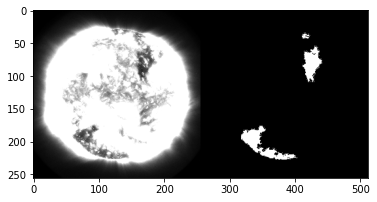

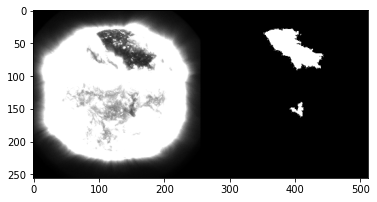

In [ ]:
def sample_visualize(image, mask):
    image = image[0, :, :]
    mask[mask == 0] = -1
    vis_img = np.concatenate((image, mask), axis=1)
    plt.imshow(vis_img, cmap="gray")
    plt.show()

image, mask, _ = data_train[1]
sample_visualize(image, mask)

image, mask, _ = data_train[25]
sample_visualize(image, mask)

### 4. Create the model
In order to perform image segmentation we use the UNet model integrated in aidapy's models module.
We need to specify the model parameters:

- model input 
- model depth 
- model output

In [ ]:
# Create a custom Unet model using the Model wrapper
# The model type to use in your use case. Here we use UNet.
model = 'unet'
    
# Number of inpuits in the UNet
model_input = 3
# Number of outputs in the UNet
model_output = 1
# The depth of the UNet
model_depth = 4
# A list that contains the model parameters
model_params = [model_input, model_output, model_depth]
# If true, we use gpu for training, else cpu
gpu = True
mode= 'train'
check_save_all = True

# Init Model Module
model = Model(model_params=model_params, gpu_use=gpu, expdir=expdir, 
              expName=expname, model_type=model, check_save_all=check_save_all, 
              mode=mode, vis=visualizer)

Making model...


### 5. Metrics to evaluate model
Here we specify which metrics we want to use
- Dice Coefficient: 
 
- IoU (Intersection over Union): 

In [ ]:
# Create the metrics using the Metrics class from aidapy

# A list with the metrics to use in your use case. 
# Check aidapy.ml.metrics.metric_func for the supported
# metrics in aidapy
get_metrics = ['DiceCoeff', 'IOU_scoring']
    
# Create the metrics
metrics = Metrics(log=log, get_metrics_split=get_metrics, gpu_use=gpu, get_add_metrics=True, vis=visualizer)

Preparing Metrics function(s)


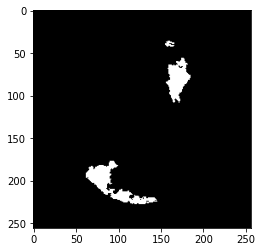

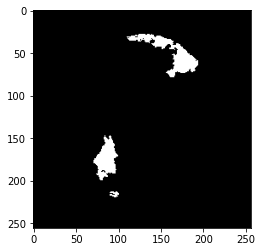

Score of DiceCoeff in epoch 1                           is inf
Score of IOU_scoring in epoch 1                           is inf


inf

In [ ]:
_, mask1, _ = data_train[1]
mask1 = torch.from_numpy(mask1)
plt.imshow(mask1, cmap="gray")
plt.show()

_,mask2,_ = data_train[1]
mask2 = torch.from_numpy(mask2)
plt.imshow(mask2, cmap='gray')
plt.show()


metrics.forward(mask1, mask2)
metrics.get_ave_score(1)

### 6. Loss functions
Here we specify which loss functions to use during training
For this example we use the Dice Coefficient Loss 

In [ ]:
# Create the loss functions using the Loss class from aidapy
# A list with all the loss functions for your use case. Check aidapy.ml.loss.loss_func for the supported
# loss functions in aidapy
lossF = ['1*DiceLoss']

# Print the total loss in every get_print iterations
get_print =10
    
# Create the loss functions
loss = Loss(log=log, get_print_every=get_print, get_loss_split=lossF, gpu_use=gpu, vis=visualizer)

Preparing loss function:
1.000 * DiceLoss


###  7. Optimizer
Here we specify the optimizer for the training procedure 
- Aidapy has many different optimizers integrated.
- Here we use the Adam optimizer.

In [ ]:
# Create an optimizer using the make_optimizer class from aidapy. 
optimizer = make_optimizer(model, LR=4e-3, weight_decay=5e-5, getoptim='ADAM',
                            momentum=0.9, betas=[0.9, 0.999], epsilon=1e-8, 
                            decay_split=[90, 160], gamma=0.1)

###  8. Training the model
This function is responsible for training the supervised learning model. In this function we iterate through the training dataset
and fit the data into the model. After that we calculate the loss between the prediction and the ground truth and we use the optimizer
to optimize the output.

In [ ]:
def train(model, data, loss, gpu, optimizer, epochs, train_iter):
    r"""Handles the training process 
        """
    torch.set_grad_enabled(True)
    loss.step()
    epoch = optimizer.get_last_epoch() + 1
    model.train()

    device = torch.device('cpu' if not gpu else 'cuda')  
    post_process = PostProcessor('seg_1cls')
    
    for batch, (input, target, _) in enumerate(data):
        input = input.to(device)
        target = target.to(device)
        optimizer.zero_grad()

        # Fit the input to the model
        output = model(input)
        
        # Post process the model output
        output = post_process(output, train=True)
        
        # Calculate losses
        loss_func = loss.forward(output.to(device), target, train_iter)

        # loss_func.requires_grad = True
        loss_func.backward()
        optimizer.step()
        train_iter += 1
        
    optimizer.schedule()
    return train_iter

### 9. Evaluating the model predictions
This function performs the evalutation of the training procedure. Here we fit the test dataset into the model and use the metrics to evaluate how well the model is learning.

In [ ]:
def test(model, data, metrics, gpu, total_dir, epoch, tot_epoch, visualize=False):
    r"""Handles evaluation process (metrics calculation, visualizations and 
           keeping checkpoints).
        """
    counter = 0
    device = torch.device('cpu' if not gpu
                                   else 'cuda')
    print("Using device: {}".format(device))
    torch.set_grad_enabled(False)
    model.eval()
    post_process = PostProcessor('seg_1cls')
    # Iterate through the dataset
    total_d = len(data)
    metrics.number_of_samples(total_d)
    for i, (input, target, denorm_input) in \
                                enumerate(data):
        # Create the full path to save the results
        savepath = osp.join(total_dir, 'Results', \
                                '%0.4d.png' % i)
        t1 = time.time()
        input = input.to(device)
        target = target.to(device)
        output = model(input)

        # post process function to use 
        output, out_vis = post_process(output, train=False)
        visualization(denorm_input, out_vis, target, savepath, epoch, show = visualize)

        # Calculate the metrics from the output
        metrics.forward(output.cpu(), target.cpu())
        t2 = time.time()

        if visualize:
            print("Process Image {}, time consumed: {}s".format(counter, round(t2-t1, 4)))

        counter += 1

    metrcs = metrics.get_ave_score(epoch)

    return metrcs

### 10. Visualizing the model predictions
This function is responsible for visualising and saving the results. The result is an image composed of three different images:
- The original image of the sun
- The target image (the ground truth)
- The prediction of the model

In [ ]:
def visualization(denorm_input, out_vis, target, savepath, epoch, show=False):
    """ Function responsible for visualizing the results
    """
    out_vis = out_vis.detach()
    mode = ['Input', 'Target', 'Pred']
    tensor = out_vis.cpu().squeeze().permute((1, 2, 0)).numpy()
    h, w, c = tensor.shape

    #Create the Empty Image
    total_width = len(mode)*w
    new_img = np.zeros((h, total_width, c))
    img = None
    for i in range(0, len(mode)):
        if mode[i] == 'Pred':
            img = tensor * 255
        elif mode[i] == 'Target':
            
            img = target.cpu().numpy().squeeze(0) * 255
                        
            if (c==3) and (len(img.shape)<3):
                img = cv2.merge((img, img, img))
                          
        elif mode[i] == 'Input':
            denorm_input = np.transpose(denorm_input.cpu().numpy().squeeze(0), (1, 2, 0))
            img = denorm_input[:, :, ::-1]
        else:
            raise("Error") 
                    
        new_img[:h, i*w:(i+1)*w, :] = img
        cv2.imwrite(savepath, new_img.astype('uint8'))
        
        if show:
            plt.imshow(new_img.astype('uint8'))


### Let's start training procedure
In order to start the training procedure we need to specify how many epochs to run. After that we are ready to initialize the training of the UNet 

In [ ]:
epochs = 5
iter = 0
best_sc = -1
for epoch in range(epochs):
    iter = train(model, loader_train, loss, gpu, optimizer, epochs, iter)
    metrcs = test(model, loader_test, metrics, gpu, total_dir, epoch, epochs)

    # Save Best Checkpoint
    if metrcs > best_sc:
        best_sc = metrcs
        model.save(epoch, is_best = True,
                          mname="model_")

    # Save Model checkpoint
    model.save(epoch, "model_")

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Total Loss in iter 0                 is 0.9342
Total Loss in iter 10                 is 0.9617
Total Loss in iter 20                 is 0.8980
Total Loss in iter 30                 is 0.5835
Total Loss in iter 40                 is 0.5604
Total Loss in iter 50                 is 0.1906
Using device: cuda
Score of DiceCoeff in epoch 0                           is 0.1466
Score of IOU_scoring in epoch 0                           is 0.0802
Total Loss in iter 60                 is 0.6028
Total Loss in iter 70                 is 0.5816
Total Loss in iter 80                 is 0.4648
Total Loss in iter 90                 is 0.2998
Total Loss in iter 100                 is 0.2694
Total Loss in iter 110                 is 0.1766
Using device: cuda
Score of DiceCoeff in epoch 1                           is 0.2048
Score of IOU_scoring in epoch 1                           is 0.1167
Total Loss in iter 120                 is 0.7432
Total Loss in iter 130                 is 0.5691
Total Loss in iter 

## Coronal Holes Segmentation - Inference

In [ ]:
import os
import os.path as osp
import torch
from torch.utils.data import dataloader
import numpy as np
import cv2
import random 
%matplotlib inline
import matplotlib.pyplot as plt

import time
from skimage import data, color
import imageio

from aidapy.ml.data.coronalholes import CoronalHoles
from aidapy.ml.models.model import Model
from aidapy.ml.postprocess import PostProcessor
from aidapy.ml.metrics import Metrics
from aidapy.ml.utils.logger import Logger

# The following commands are necessary to make the results reproducible
random.seed(4)
torch.manual_seed(4)
torch.backends.cudnn.deterministic = True

In [ ]:
# The directory that has the results of all the use cases
expdir = "Experiments"

# The directory that has the result of a specific use case.
expname = "Coronal_Holes_Test"

# Check and Create Folders
os.makedirs(expdir, exist_ok=True)

# The total path 
total_dir = osp.join(expdir, expname)

# Create the directories for the results
os.makedirs(total_dir, exist_ok=True)

# In the Results we save the training/testing results.
os.makedirs(total_dir + "/Results", exist_ok=True)

log = Logger(experiment_dir=expdir,experiment_name=expname)

In [ ]:
# Create a custom Unet model using the Model wrapper
# The model type to use in your use case. Here we use UNet.
model = 'unet'
    
# Number of inpuits in the UNet
model_input = 3
# Number of outputs in the UNet
model_output = 1
# The depth of the UNet
model_depth = 4
# A list that contains the model parameters
model_params = [model_input, model_output, model_depth]

# If true, we use gpu for training, else cpu
gpu = True
mode= 'eval'

check_resume = True
pretrained   = "Experiments/Coronal_Holes/checkpoints/model_2.pt"

model = Model(model_params=model_params, gpu_use=gpu, expdir=expdir, 
            expName=expname, model_type=model, check_resume=check_resume, 
            pretrained=pretrained, mode=mode)

model.eval()

In [ ]:
# Create a dataloader class to load the dataset. In this case we use the coronalholes dataloader
datapath = "data"

# The path to the dataset
test_path = datapath + '/CoronalHoles_test'
# A dictionary in which the key must be 'data_path' and the value must be the path to the dataset
data_Vars_test = {'data_path': test_path}


# This variable can be either "memory" if we want to load a dataset from memory
# or "download" if we want to download a dataset. 
data_mode = "memory"

# How to split the dataset in train-validation set.
split = "0-100"

# Here we create the dataloader. 
data_test = CoronalHoles(get_data_mode=data_mode, get_data_vars=data_Vars_test,
                            split_train_test=split, random_seed=3, train=False)


loader_test = (dataloader.DataLoader(
                data_test,
                batch_size=1,
                shuffle=False,
                pin_memory=False,
                num_workers=0))

In [ ]:
# Create the metrics using the Metrics class from aidapy
# A list with the metrics to use in your use case. 
# Check aidapy.ml.metrics.metric_func for the supported
# metrics in aidapy
get_metrics = ['RMSE', 'RSquared', 'CC']
    
# Create the metrics
metrics = Metrics(log=log, get_metrics_split=get_metrics, gpu_use=gpu)

Preparing Metrics function(s)


In [ ]:
def test(model, data, metrics, gpu, total_dir, epoch, tot_epoch, visualize=False):
    r"""Handles evaluation process (metrics calculation, visualizations and 
           keeping checkpoints).
        """
    counter = 0
    device = torch.device('cpu' if not gpu
                                   else 'cuda')
    print("Using device: {}".format(device))
    torch.set_grad_enabled(False)
    model.eval()
    post_process = PostProcessor('seg_1cls')
    # Iterate through the dataset
    total_d = len(data)
    metrics.number_of_samples(total_d)
    for i, (input, target, denorm_input) in \
                                enumerate(data):
        # Create the full path to save the results
        savepath = osp.join(total_dir, 'Results', \
                                '%0.4d.png' % i)
        t1 = time.time()
        input = input.to(device)
        target = target.to(device)
        output = model(input)

        # post process function to use 
        output, out_vis = post_process(output, train=False)

        # Calculate the metrics from the output
        metrics.forward(output.cpu(), target.cpu())
        t2 = time.time()

        if visualize:
            visualization(denorm_input, out_vis, target, savepath, epoch)
            print("Process Image {}, time consumed: {}s".format(counter, round(t2-t1, 4)))

        counter += 1

    metrcs = metrics.get_ave_score(epoch)

    return metrcs


def visualization(denorm_input, out_vis, target, savepath, epoch):
    """ Function responsible for visualizing the results
    """
    out_vis = out_vis.detach()
    mode = ['Input', 'Target', 'Pred']
    tensor = out_vis.cpu().squeeze().permute((1, 2, 0)).numpy()
    h, w, c = tensor.shape

    #Create the Empty Image
    total_width = len(mode)*w
    new_img = np.zeros((h, total_width, c))
    img = None
    for i in range(0, len(mode)):
        if mode[i] == 'Pred':
            img = tensor * 255
        elif mode[i] == 'Target':
            
            img = target.cpu().numpy().squeeze(0) * 255
                        
            if (c==3) and (len(img.shape)<3):
                img = cv2.merge((img, img, img))
                          
        elif mode[i] == 'Input':
            denorm_input = np.transpose(denorm_input.cpu().numpy().squeeze(0), (1, 2, 0))
            img = denorm_input[:, :, ::-1]
        else:
            raise("Error") 
                    
        new_img[:h, i*w:(i+1)*w, :] = img
        cv2.imwrite(savepath, new_img.astype('uint8'))
        plt.imshow(new_img.astype('uint8'))


Using device: cuda
Process Image 0, time consumed: 0.0843s


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([1, 256, 256])) that is different to the input size (torch.Size([1, 1, 256, 256])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Process Image 1, time consumed: 0.052s
Process Image 2, time consumed: 0.0517s
Process Image 3, time consumed: 0.0445s
Process Image 4, time consumed: 0.044s
Process Image 5, time consumed: 0.0438s
Process Image 6, time consumed: 0.0438s
Process Image 7, time consumed: 0.0425s
Process Image 8, time consumed: 0.0335s
Process Image 9, time consumed: 0.0339s
Process Image 10, time consumed: 0.033s
Process Image 11, time consumed: 0.0331s
Process Image 12, time consumed: 0.033s
Process Image 13, time consumed: 0.0311s
Process Image 14, time consumed: 0.0311s
Process Image 15, time consumed: 0.0306s
Process Image 16, time consumed: 0.03s
Process Image 17, time consumed: 0.0299s
Process Image 18, time consumed: 0.0313s
Process Image 19, time consumed: 0.0302s
Process Image 20, time consumed: 0.0299s
Process Image 21, time consumed: 0.0302s
Process Image 22, time consumed: 0.0297s
Process Image 23, time consumed: 0.0304s
Process Image 24, time consumed: 0.0298s
Process Image 25, time consumed

0.10439119896831746

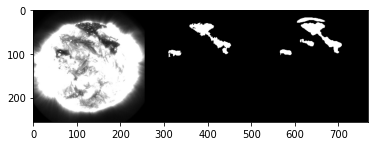

In [ ]:
test(model, loader_test, metrics, gpu, total_dir, 0, 1, visualize=True)

# **Unsupervised Case** - Coronal Holes Segmentation through Image Clustering

## 1. Import all Necessary Packages

In [ ]:
import os
import os.path as osp
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image

from aidapy.ml.data.ch_unsuper import ch_unsuper 
from aidapy.ml.data.data_unsuper import Data_Unsuper
from aidapy.ml.models.kmeans import KMeans
from aidapy.ml.postprocess import PostProcessor
from aidapy.ml.utils.logger import Logger

import time
%matplotlib inline

## 2. Create the necessary directories to save the results
Here we set the necessary paths and create the directories to save the results. 
Necessary directories:
The directory that has the results of all the use casesThe directory that has the results of the specific use-case 
We also create a logger in order to log our results, loss functions and metrics.

In [ ]:
expdir = "Experiments"
expname = "Kmeans_notebook"

total_dir = osp.join(expdir,
                    expname)
# Create the directories for the results
os.makedirs(total_dir, exist_ok=True)
# In the checkpoints we save the model weights
os.makedirs(total_dir + "/checkpoints", exist_ok=True)
# In the Results we save the training/testing results.
os.makedirs(total_dir + "/Results", exist_ok=True)

log = Logger(experiment_dir=expdir,experiment_name=expname)

## 3. Load Data
We will load the Coronal Holes Unsupervised dataset by using the Data_Unsuper dataloader. 
To do so, we specify the path of the data, if we want to load it from memory, and how we want to split them in train-validation set. 

We will use pytorch to run our use-case, so we need to wrap the dataloaders in pytorch.

In [ ]:
# Create a custom dataloader. Here we use the ch_unsuper dataloader
# In this case we need the path of the data and the number of images we want to use from the data

path = 'data/Coronal_Holes_unsupervised_case/unsupervised_case'
data_Vars = {'data_path': path}

data = Data_Unsuper(log=log, get_train_dbs=['ch_unsuper'], data_Vars=data_Vars, k=20, random_seed=10)
## Visualize eikones
train_data = data.loader_train

Dataset (Train): ch_unsuper


## Let's visualize our dataset

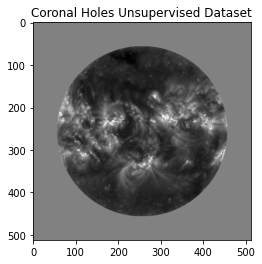

In [ ]:
for i, (vectorized, denorm_input) in enumerate(train_data):
    image = vectorized
    mask = denorm_input
    break


plt.imshow(mask, cmap="gray")
plt.title('Coronal Holes Unsupervised Dataset')
plt.show()

## 4. Create the model
In order to perform image segmentation we use the K-Means model integrated in aidapy'sunsupervised models module.K-Means is a clustering unsupervised learning model that aims that aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean.  In order to create our K-Means model, we need to specify the model parameters: 
- Number of clusters 
- KHow many attempts to perform K-Means per input using different initial labels
- The maximum iterations per input
- Epsilon, which is the accuracy we want to achieve

In [ ]:
# Create a custom unsupervised model. In this case we create a kmeans model
# Give as arguments the necessary parameters to build the model
model = KMeans(K=15, attempts=10, max_iter=20, epsilon=1.0)

## 5. Visualizing the model predictions
This function is responsible for visualising and saving the results. The result is an image composed of three different images:
- The original image of the sun
- k-means mask
- corrected mask

In [ ]:
def visualize(data, output, savepath):
    # Function to visualize the outputs of the use case
    result = np.concatenate([data.image_, output[0], output[2], np.invert(output[1])], axis=1)
    h1, w1 = result.shape[:2]
            
    # Put Image State for better understanding
    step = int(w1 / 4)
    DICT_MES = ['original', 'kmeans Clustering', 'kmeans mask', 'corrected_mask']
    wid = step // 2
    for op in range(0, 4):
        cv2.putText(result, DICT_MES[op], (wid, h1-10), 1, 1.2, (255,255,255), 1, 1)
        wid += step
    
    cv2.imwrite(savepath, result.astype('uint8'))
    plt.imshow(result, cmap="gray")

## 6. Fitting the data into the model
This function performs the fitting of the dataset into the K-Means in order to create the clusters and perform image segmentation.

In [ ]:
def test(model, data, total_dir):
    r""" Handles training process.  It iterates through the dataset, uses each input to fit the model
    and visualizes the results
    """
        
    print("\n")
    print("####"*10)

    # Load a post process class from aidapy to post process your images 
    postprocess = PostProcessor('ch_kmeans')

    for i, (vectorized, denorm) in enumerate(data):
        savepath = osp.join(total_dir, 'Results', \
                                '%0.4d.png' % i)
        
        # Measure time
        t1 = time.time()

        #Fit K-Means model
        output = model.forward(vectorized)

        #Postprocess
        output = postprocess(output, data, denorm)
        
        # Use the visualize function to save the result images
        visualize(data, output, savepath)

        # Measure time
        t2 = time.time()
        print("Process image {}, time consumed: {}s".format(i, round(t2-t1, 4)))

## Start inference Mode and Visualize results and time measurements



########################################
Process image 0, time consumed: 2.3412s
Process image 1, time consumed: 1.9929s
Process image 2, time consumed: 2.2454s
Process image 3, time consumed: 2.2268s
Process image 4, time consumed: 1.9811s
Process image 5, time consumed: 2.083s
Process image 6, time consumed: 2.048s
Process image 7, time consumed: 2.3379s
Process image 8, time consumed: 2.3418s
Process image 9, time consumed: 2.0758s
Process image 10, time consumed: 2.0031s
Process image 11, time consumed: 2.2865s
Process image 12, time consumed: 2.1489s
Process image 13, time consumed: 1.9881s
Process image 14, time consumed: 2.3021s
Process image 15, time consumed: 2.1978s
Process image 16, time consumed: 2.1379s
Process image 17, time consumed: 1.9609s
Process image 18, time consumed: 1.9848s
Process image 19, time consumed: 2.2839s


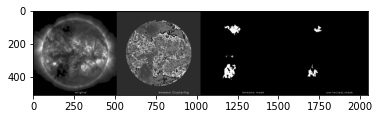

In [ ]:
# Call the test function with the model, data and path 
test(model, train_data, total_dir)